In [1]:
library("deSolve")
library("ggplot2")

Warning message:
"package 'deSolve' was built under R version 3.6.2"Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [69]:
V_U = 1
H_U = 100

V_L = V_U/100
H_L = H_U

e = 5e-7 

D_b = 0.0001
beta = 1/H_U#0

phi_0 = 0.2
r_0 = 1e-5

K_a = 2e-7
D_p = 1e-9

D_A = 0

B = 50
d = 0.00
i = 1

delay = 0.8
N_arb = 1e+3

In [107]:
# functions for ODE solving here

monod <- function(x, H){
  return (x/(x+H))
}

q <- function(x, B){
    return (1/(x*B + 1))
}

arb <- function(a){
    return (a/(a+1e+7))
}

f <- function(t, y, params){ # Main ODE system
  Uninfected = y['Uninfected']
  Resource = y['Resource']
  Phage = y['Phage']
  Lysogens = y['Lysogens']
  Arbitrium = y['Arbitrium']
  Lytic = y['Lytic']

  a_phi = params['a_phi']
  a_r = params['a_r']
  
  phi = a_phi*(1-phi_0)*arb(Arbitrium) + phi_0
  r = (q(Resource, beta) < a_r) * r_0
    
  N_U = V_U*Uninfected*monod(Resource,H_U)  
  N_L = V_L*Lysogens*monod(Resource,H_L) 
  
  I_lyso = phi*K_a*Phage*Uninfected
  I_lyt = (1-phi)*K_a*Phage*Uninfected
  
  if (t > delay){
  delayed_values = lagvalue(t-delay)}
  else{delayed_values = c(0,0,0,0,0,0)}

        
  lyses = (1-phi)*K_a*delayed_values[3]*delayed_values[1] - r*delayed_values[4]
    
  dUninfecteddt = N_U - D_b*Uninfected*q(Resource, beta) - K_a*Phage*Uninfected - d*Uninfected
  dLysogensdt = N_L + I_lyso - D_b*Lysogens*q(Resource, beta) - r*Lysogens - d*Lysogens
  dPhagedt = B*lyses - K_a*Phage*(Uninfected) - D_p*Phage - d*Phage  #this is supposed to have lysogens too but meh?
  dResourcedt = -e*(N_U+N_L) + i - d*Resource
  dArbitriumdt = N_arb*(I_lyso+I_lyt) - D_A*Arbitrium - d*Arbitrium
  dLyticdt = I_lyt + r*Lysogens -lyses - d*Lytic
    
  temp <- c(dUninfecteddt, dResourcedt, dPhagedt, dLysogensdt, dArbitriumdt, dLyticdt)
  
  return(list(temp))
}


In [118]:
# Playing with the model here. 
out = data.frame()

# Let the population grow to its normal equilibrium size
times <- seq(0,to=50,by=0.1)
initials <- c(Uninfected = 1, Resource=100,Phage=1000,Lysogens=0, Arbitrium=0, Lytic = 0)
out_1 <- as.data.frame(dede(func=f,y=initials,parms = c(a_phi = 0.5, a_r = 1),times=times))
out <- rbind(out, out_1)

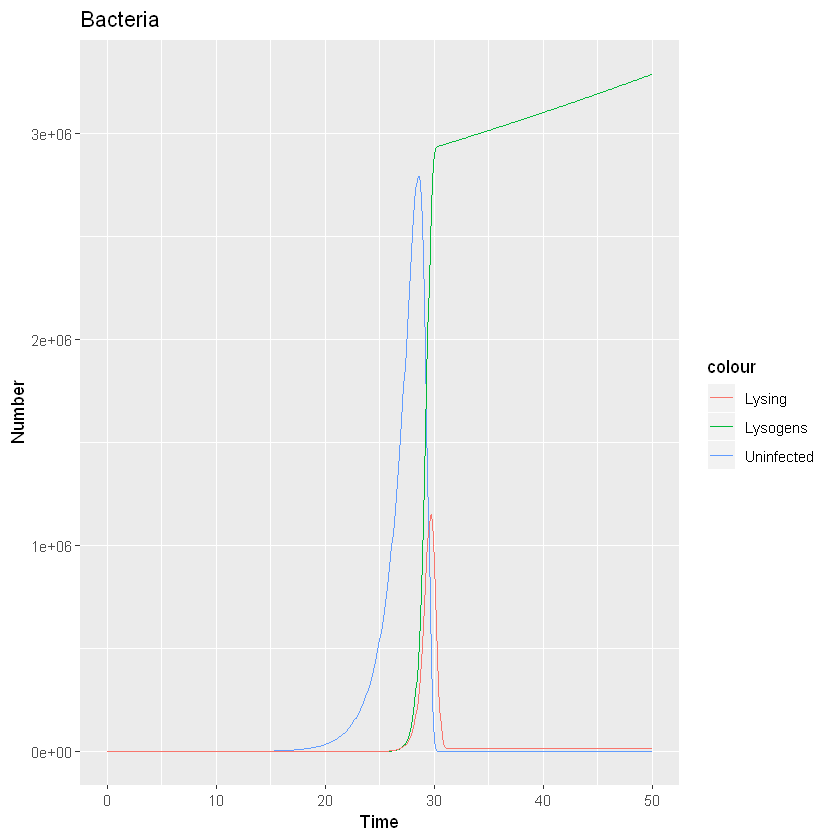

In [119]:
ggplot(out, aes(time))+geom_line(aes(y=Uninfected, color='Uninfected')) +geom_line(aes(y=Lysogens, color='Lysogens'))  + geom_line(aes(y=Lytic, color='Lysing'))+ labs(title='Bacteria', x='Time', y='Number') 

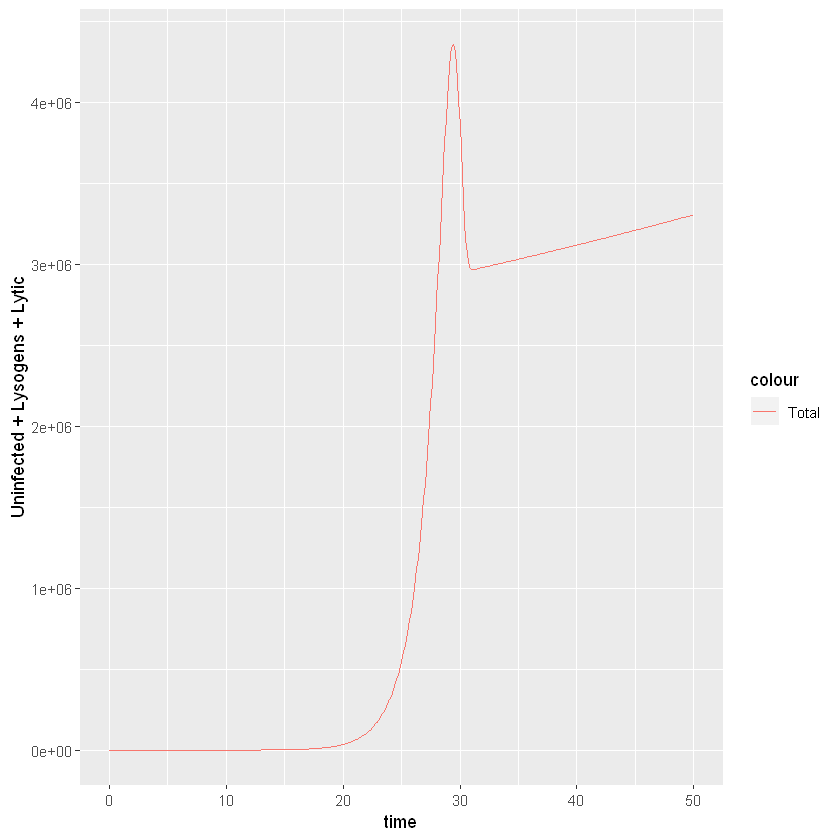

In [120]:
ggplot(out, aes(time))+geom_line(aes(y=Uninfected+Lysogens+Lytic, color='Total'))

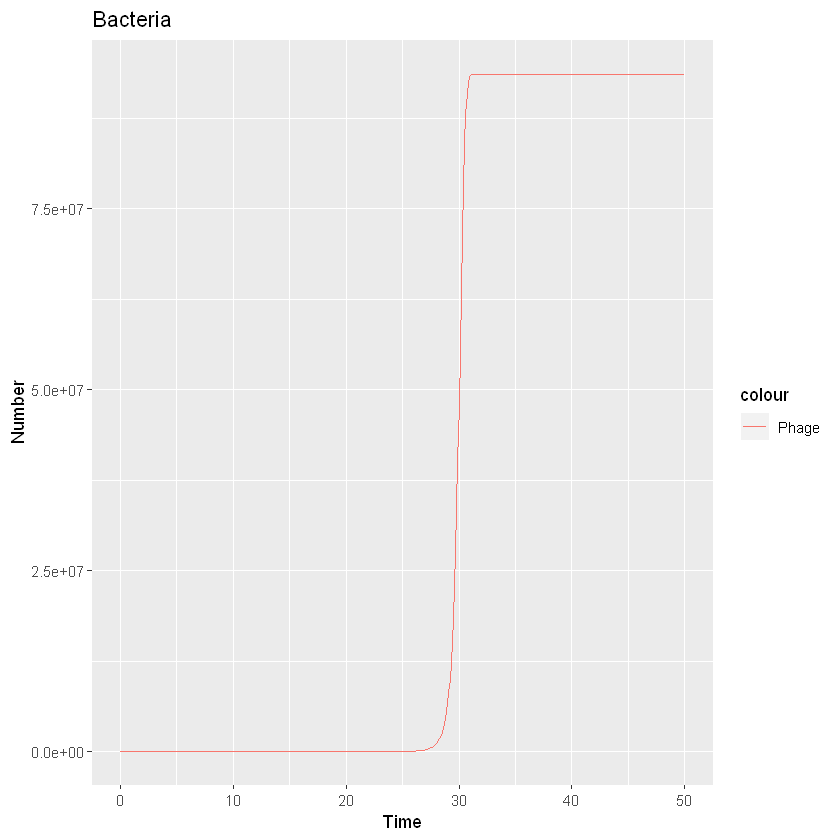

In [121]:
ggplot(out, aes(time))+geom_line(aes(y=Phage, color='Phage'))  + labs(title='Bacteria', x='Time', y='Number') 

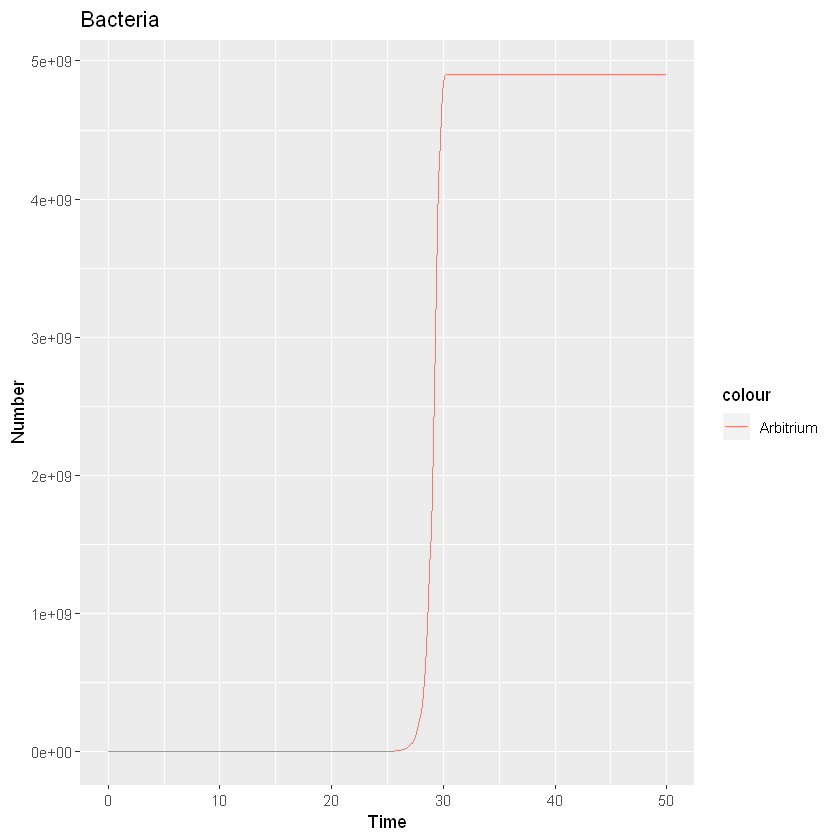

In [122]:
ggplot(out, aes(time))+geom_line(aes(y=Arbitrium, color='Arbitrium'))  + labs(title='Bacteria', x='Time', y='Number') 

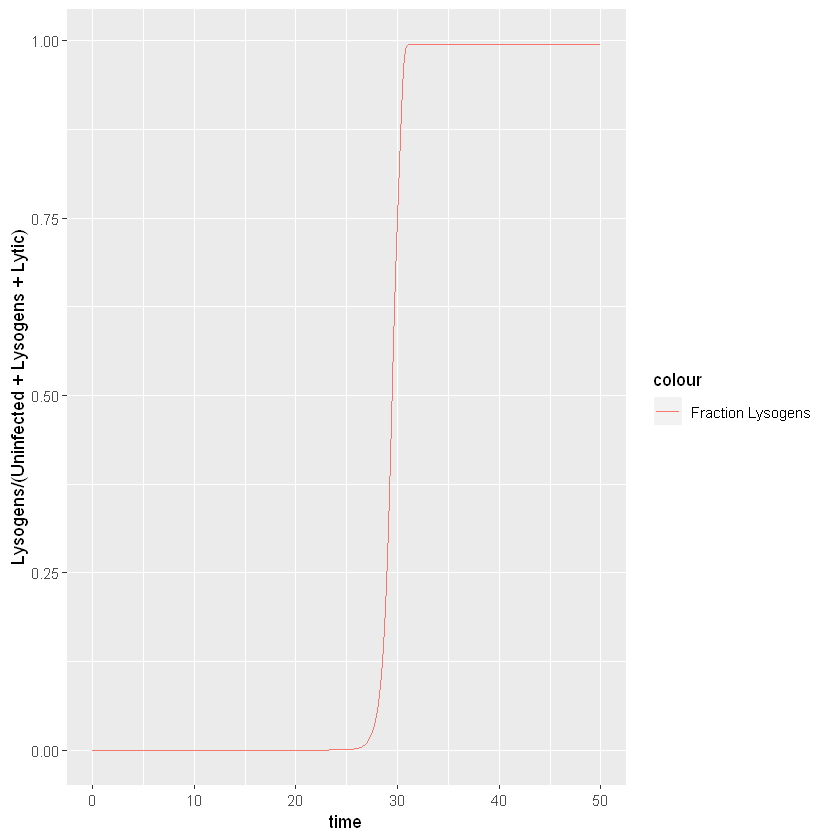

In [123]:
ggplot(out, aes(time))+ geom_line(aes(y=Lysogens/(Uninfected+Lysogens+Lytic), color='Fraction Lysogens'))